In [3]:
from nltk.tokenize import word_tokenize

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

In [5]:
df=pd.read_csv(r"D:\ML_DataSet\emails.csv")

In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df["spam"].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(33)

In [11]:
df.drop_duplicates()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [12]:
size=df['spam'].value_counts()

In [13]:
size

spam
0    4360
1    1368
Name: count, dtype: int64

In [14]:
!python --version

Python 3.12.4


([<matplotlib.patches.Wedge at 0x1fc5304d7c0>,
 [Text(-0.7500411165527974, -0.8046355221342351, 'not_spam'),
  Text(0.7500410462093203, 0.8046355877049116, 'spam')],
 [Text(-0.4091133363015258, -0.43889210298230996, '76.1%'),
  Text(0.4091132979323565, 0.43889213874813354, '23.9%')])

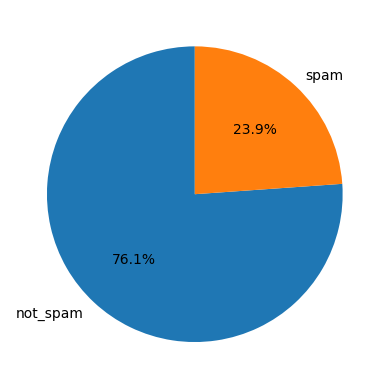

In [15]:
plt.pie(size,labels=["not_spam","spam"],autopct="%1.1f%%",startangle=90)

In [16]:
df["text"] = df["text"].str.lower().str.replace("subject:", "", regex=False)


In [27]:
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [29]:
spam=df[df["spam"]==1]
not_spam=df[df["spam"]==0]

In [31]:
not_spam=not_spam.sample(n=len(spam),random_state=42)

In [33]:
len(not_spam)
len(spam)

1368

In [35]:
spam.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


([<matplotlib.patches.Wedge at 0x26b13c2f650>,
 [Text(-1.0999999999999959, -9.616505800409723e-08, 'not_spam'),
  Text(1.0999999999999832, 1.9233011600819372e-07, 'spam')],
 [Text(-0.5999999999999978, -5.2453668002234845e-08, '50.0%'),
  Text(0.5999999999999908, 1.0490733600446929e-07, '50.0%')])

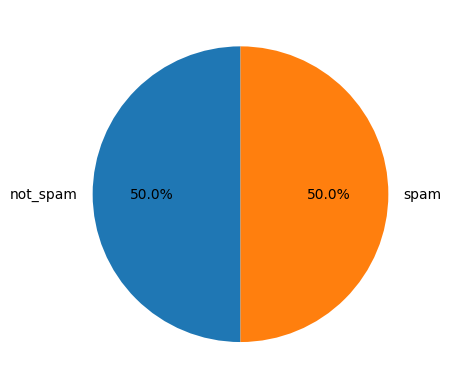

In [37]:
data=pd.concat([spam,not_spam])
size=data["spam"].value_counts()
plt.pie(size,labels=["not_spam","spam"],autopct="%1.1f%%",startangle=90)

In [39]:
data=data.sample(frac=1,random_state=12).reset_index(drop=True)

In [41]:
data.head()

,text,spam
0,"hello from enron dear dr . mcmullen , a few...",0
1,"fw : having iris visit london anita , it se...",0
2,just to her . . . soft viagra at $ 1 . 62 pe...,1
3,pro opticus good morning all : below is an ...,0
4,great divide lodge vince and shirley : i ha...,0


In [43]:
df["text"]=df["text"].str.lower()

In [45]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # download tokenizer models if not done

df["text"] = df["text"].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
df["text"]

0       [naturally, irresistible, your, corporate, ide...
1       [the, stock, trading, gunslinger, fanny, is, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [4, color, printing, special, request, additio...
4       [do, not, have, money, ,, get, software, cds, ...
                              ...                        
5723    [re, :, research, and, development, charges, t...
5724    [re, :, receipts, from, visit, jim, ,, thanks,...
5725    [re, :, enron, case, study, update, wow, !, al...
5726    [re, :, interest, david, ,, please, ,, call, s...
5727    [news, :, aurora, 5, ., 2, update, aurora, ver...
Name: text, Length: 5728, dtype: object

In [49]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df["text"] = df["text"].apply(lambda words: [word for word in words if word.lower() not in stop_words])


In [52]:
df["text"]

0       [naturally, irresistible, corporate, identity,...
1       [stock, trading, gunslinger, fanny, merrill, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [4, color, printing, special, request, additio...
4       [money, ,, get, software, cds, !, software, co...
                              ...                        
5723    [:, research, development, charges, gpg, !, -,...
5724    [:, receipts, visit, jim, ,, thanks, invitatio...
5725    [:, enron, case, study, update, wow, !, day, ....
5726    [:, interest, david, ,, please, ,, call, shirl...
5727    [news, :, aurora, 5, ., 2, update, aurora, ver...
Name: text, Length: 5728, dtype: object

In [55]:
from nltk.stem import PorterStemmer

In [57]:
porterstem=PorterStemmer()
df["text"]=df["text"].apply(lambda tokens :[porterstem.stem(word) for word in tokens ])

In [58]:
df["text"] = df["text"].apply(lambda tokens: ' '.join(tokens))



In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
vectorizer = TfidfVectorizer()

# Fit it on your training data
X = vectorizer.fit_transform(df["text"])  # Or use .fit_transform(X_train) if needed

with open("TfidfVectorizer1.pkl", "wb") as file:
    pickle.dump(vectorizer, file)


NameError: name 'df' is not defined

In [113]:
y=df["spam"]

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
le=LogisticRegression()
le.fit(X_train,y_train)


LogisticRegression()

In [120]:

predict=le.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predict))

Accuracy: 0.9685863874345549


In [121]:

print(classification_report(predict,y_test))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1326
           1       0.88      0.99      0.94       393

    accuracy                           0.97      1719
   macro avg       0.94      0.98      0.96      1719
weighted avg       0.97      0.97      0.97      1719



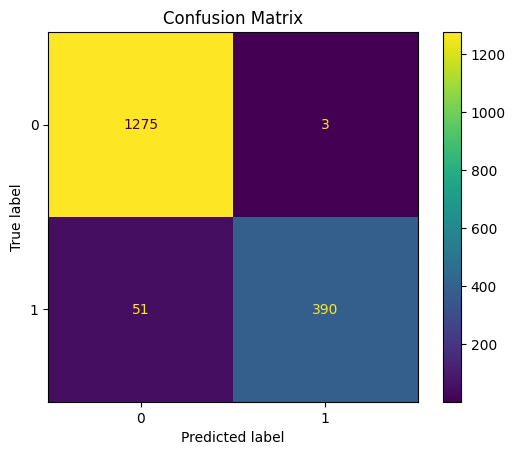

In [122]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [126]:
import pickle
with open("Email_Spam1.pkl", "wb") as file:
    pickle.dump(le, file)


['Email_Spam1.joblib']

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [130]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [134]:
y_predict=model.predict(X_test)

In [135]:
print("Accuracy",accuracy_score(y_predict,y_test))

Accuracy 0.9645142524723677


In [136]:

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1337
           1       0.86      1.00      0.93       382

    accuracy                           0.96      1719
   macro avg       0.93      0.98      0.95      1719
weighted avg       0.97      0.96      0.97      1719



In [137]:
rcm=confusion_matrix(y_predict,y_test)

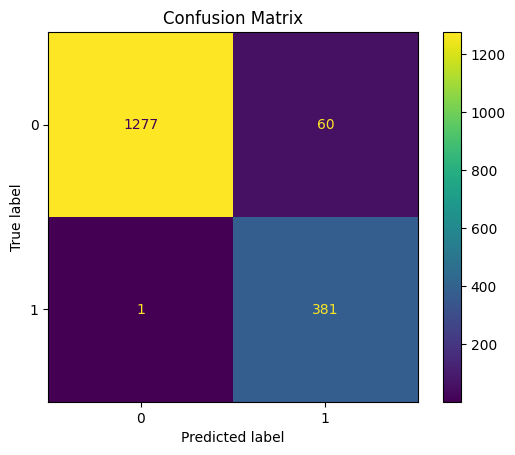

In [138]:
dis=ConfusionMatrixDisplay(confusion_matrix=rcm)
dis.plot()
plt.title('Confusion Matrix')
plt.show()

In [139]:
import pickle
with open("Email_Spam1_RF.pkl", "wb") as file:
    pickle.dump(model, file)
